In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import numpy as np
%matplotlib notebook

In [141]:
sea = pd.read_csv('https://www.epa.gov/sites/production/files/2016-08/sea-level_fig-1.csv', skiprows=6, sep=",", usecols=['Year', 'CSIRO - Adjusted sea level (inches)'])
sea.set_index('Year', inplace=True)
sea['Sea Level (cm)'] = sea['CSIRO - Adjusted sea level (inches)'] * 0.39370
sea = sea.dropna()
sea = sea[1:]


In [142]:
wt = pd.read_table('ftp://ftp-cdc.dwd.de/pub/CDC/regional_averages_DE/annual/air_temperature_mean/regional_averages_tm_year.txt', sep=';', skiprows=1)
wt = wt.drop(['Jahr.1', 'Unnamed: 19'], axis=1)
wt.rename(columns={'Jahr': 'Year'}, index=str, inplace=True)
wt.rename(columns={'Deutschland': 'Germany'}, index=str, inplace=True)
wt.set_index('Year', inplace=True)
wt = wt[:-5]

<IPython.core.display.Javascript object>


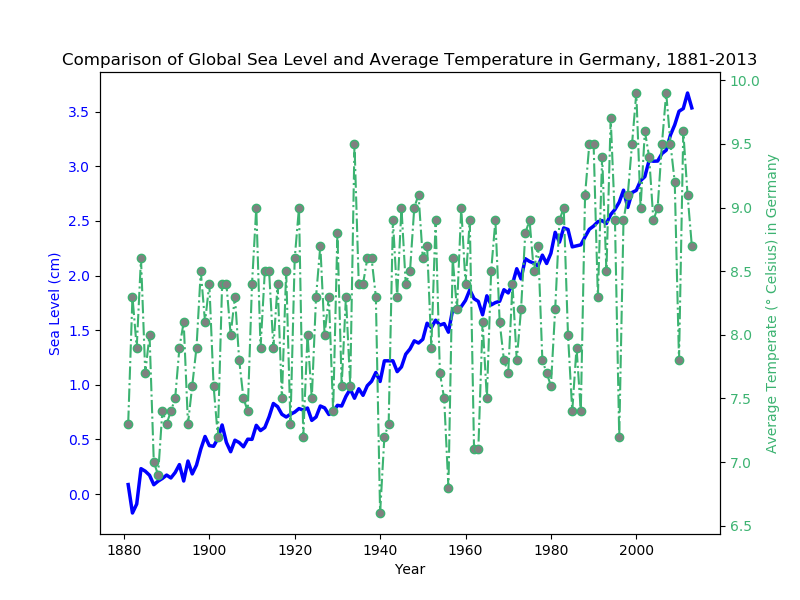

In [163]:
merged = pd.merge(sea, wt, how='outer', on='Year')
merged.drop('CSIRO - Adjusted sea level (inches)', axis=1)

y1 = merged['Sea Level (cm)']
y2 = merged['Germany']

fig, ax1 = plt.subplots()

color = 'blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Sea Level (cm)', color=color)
ax1.plot(y1, color=color, linewidth=2.5, zorder=2)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'mediumseagreen'
ax2.set_ylabel('Average Temperate (° Celsius) in Germany', color=color) 
ax2.plot(y2, color=color, linestyle='-.', marker='o', markerfacecolor='grey', markeredgecolor=color, zorder=1)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Comparison of Global Sea Level and Average Temperature in Germany, 1881-2013', pad=5)
fig.set_size_inches(8,6)
plt.show()

In [99]:
y1.corr(y2)

0.5138628129881505